#### Regressão Linear Multipla

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("housing.csv", sep=",", encoding="iso-8859-1")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [4]:
independente.shape

(489, 3)

In [5]:
dependente = df.iloc[:, 3].values
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [6]:
# Modelo de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [7]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [8]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [9]:
multipla.intercept_

434789.45509552216

In [10]:
multipla.coef_

array([ 85325.36412937, -10775.41479323, -20133.58779106])

In [11]:
print("Equação: Valor = {:.2f} + ({:.2f})*RM + ({:.2f})*LSTAT + ({:.2f})*PTRATIO".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2]))

Equação: Valor = 434789.46 + (85325.36)*RM + (-10775.41)*LSTAT + (-20133.59)*PTRATIO


In [12]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

0.7343049403294957

**TESTE**

In [13]:
previsoes = multipla.predict(x_teste)
previsoes

array([418504.52251533, 682498.59311161, 310842.03220354, 399602.67212048,
       529013.04970446, 364349.16756502, 241564.07559959, 413075.10184459,
       476051.89023052, 371925.92192458, 324382.18849665, 357068.87403347,
       472650.96518839,  52625.76046357, 486476.7874084 , 312653.08514703,
       465067.60969605, 614663.51972717, 383059.21254559, 653229.85415898,
       677008.34036381, 653364.33988067,  15201.46316315, 452877.56192735,
       360692.75896586, 754677.40725013, 714803.22773315, 754640.19558449,
       430756.93101727, 422579.57707332, 378309.3992427 , 461958.22362764,
       472103.18520444, 681780.56381622, 457070.41410848, 769207.31373834,
       520822.33816699, 261675.315203  , 503180.52774604, 590132.54786611,
       324624.03541901, 452521.53520288, 400704.94316867, 498314.39406844,
       280336.01343561, 365481.99718596, 525798.46427921, 361547.63013434,
       716795.14226269, 407424.79029782, 679886.98036124, 445827.68346551,
       614892.98134094, 3

In [14]:
y_teste

array([ 417900.,  632100.,  281400.,  577500.,  474600.,  359100.,
        247800.,  474600.,  449400.,  411600.,  214200.,  214200.,
        428400.,  375900.,  577500.,  327600.,  420000.,  489300.,
        470400.,  640500.,  651000.,  690900.,  147000.,  441000.,
        367500.,  966000.,  756000.,  888300.,  455700.,  445200.,
        323400.,  455700.,  430500.,  867300.,  445200.,  875700.,
        415800.,  268800.,  590100.,  497700.,  231000.,  315000.,
        388500.,  449400.,  413700.,  352800.,  453600.,  306600.,
        898800.,  514500.,  743400.,  474600.,  600600.,  304500.,
        661500.,  489300.,  422100.,  184800.,  525000.,  249900.,
        407400.,  361200.,  428400.,  392700.,  428400.,  472500.,
        258300.,  550200.,  346500.,  199500.,  302400.,  611100.,
        396900.,  585900.,  279300.,  483000.,  462000.,  218400.,
        518700.,  420000.,  392700.,  980700.,  455700.,  514500.,
        480900.,  520800.,  485100.,  525000.,  390600.,  5691

In [15]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

0.681781412438009

In [16]:
# Fazendo previsões para valores distintos
valor_casa = multipla.predict([[6,20,12]])
valor_casa

array([489630.29051446])

**MÉTRICAS**

In [17]:
# Erro absoluto
abs(y_teste - previsoes).mean()

71651.46435650405

In [18]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

71651.46435650405

In [19]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

9232768512.151463

In [20]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

96087.2963099257

### **Validação Cruzada**

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [22]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [23]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.83061794, 0.77028683, 0.46606666, 0.81532627, 0.79492754,
       0.60625828, 0.82164061, 0.7750116 , 0.58744519, 0.74753069,
       0.76227037, 0.51253844, 0.71206526, 0.73425176, 0.45176491])

In [24]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 69.25%


##### ***REGRESSÃO LINEAR SIMPLES:*** R² = 0,57/0,60; RMSE = 99315,5; R² Validação Cruzada: 55,97%

##### ***REGRESSÃO LINEAR MÚLTIPLA:*** R² = 0,73/0,68; RMSE = 96087,3; R² Validação Cruzada: 69,25%

### **Avaliando a Regressão Linear Múltipla com Statsmodels**

In [25]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [26]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [27]:
# Criação do modelo
modelo = smf.ols('MEDV ~ RM + LSTAT + PTRATIO', data = df).fit()

In [28]:
residuos = modelo.resid
residuos

0     -128371.739762
1      -71577.148313
2       81946.881920
3       76551.704130
4      148383.407464
           ...      
484     -1541.448492
485     -4797.202628
486    -46918.775678
487    -61950.456779
488   -192725.539836
Length: 489, dtype: float64

#### Teste de Normalidade dos resíduos

In [29]:
import scipy.stats as stats

##### Ho = distribuição normal: p > 0.05
##### Ha = distribuição != normal: p <= 0.05



In [30]:
estatistica, p = stats.shapiro(residuos)
print(f"Estatística de teste: {estatistica}")
print(f"p-valor: {p}")

Estatística de teste: 0.9633497595787048
p-valor: 1.0876366474121824e-09


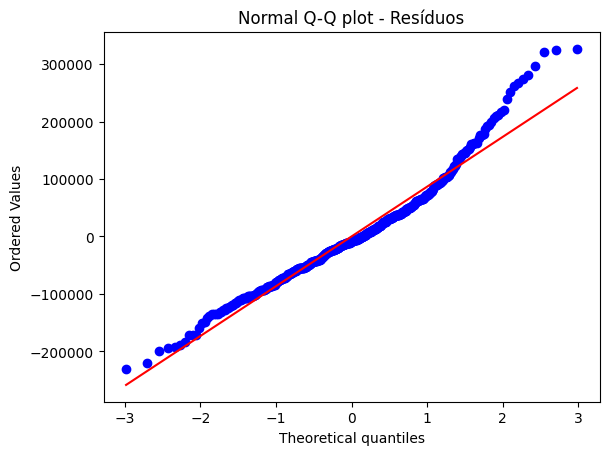

In [31]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

#### Análise da Homecedasticidade dos resíduos
___
##### (resíduos com variação constante)

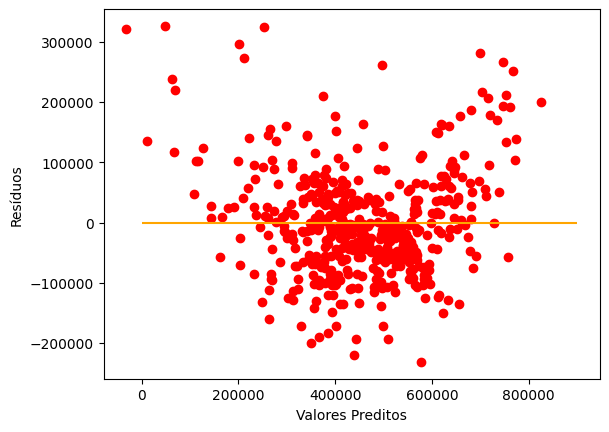

In [32]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=900000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

#### Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)
- Ho = existe homocedasticidade: p > 0.05
- Ha = não existe homocedasticidade: p <= 0.05

In [33]:
from statsmodels.compat import lzip

In [34]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
print(f"Estatística de teste: {estatistica}")
print(f"p-valor: {p}")
print(f"f-valor: {f}")
print(f"fp-valor: {fp}")

Estatística de teste: 14.866517741157674
p-valor: 0.0019343456956172854
f-valor: 5.069079611723637
fp-valor: 0.0018260051160025844


##### Outliers nos resíduos

In [35]:
outliers = modelo.outlier_test()
outliers.max()

student_resid    3.887418
unadj_p          0.999502
bonf(p)          1.000000
dtype: float64

In [36]:
outliers.min()

student_resid   -2.648018
unadj_p          0.000115
bonf(p)          0.056456
dtype: float64

#### Ausência de Multicolinearidade
- Somente entre as variáveis independentes
- Considera multicolinearidade quando r > 0.9

In [37]:
variaveis = df[['RM', 'LSTAT', 'PTRATIO']]
variaveis.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [38]:
corelacoes = variaveis.corr(method='pearson')
corelacoes

,RM,LSTAT,PTRATIO
RM,1.000000,-0.612033,-0.304559
LSTAT,-0.612033,1.000000,0.360445
PTRATIO,-0.304559,0.360445,1.000000


#### Análise do Modelo

##### Intercept
- p_valor para cada coeficiente < 0,05 (estatisticamente significativos).
- Adjusted R-squared (explicação do modelo atrevés dos dados).
- p_valor da estatística F < 0,05 (valida o modelo de regressão).

In [39]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Sat, 27 Jan 2024   Prob (F-statistic):          9.96e-133
Time:                        15:18:51   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.155e+05   6.88e+04      6.035      0.0

#### ***Equação:*** Valor da casa = 4.155e+05 + 8.657e+04.RM - 1.085e+04.LSTAT + 1.949e+04.PTRATIO


In [40]:
# Criando uma coluna com previsão
df['previsao'] = modelo.fittedvalues

In [41]:
df.head()

,RM,LSTAT,PTRATIO,MEDV,previsao
0,6.575,4.98,15.3,504000.0,632371.739762
1,6.421,9.14,17.8,453600.0,525177.148313
2,7.185,4.03,17.8,728700.0,646753.118080
3,6.998,2.94,18.7,701400.0,624848.295870
4,7.147,5.33,18.7,760200.0,611816.592536


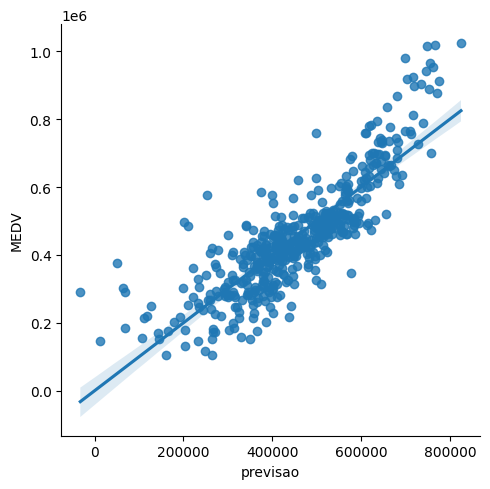

In [42]:
sns.lmplot(x='previsao', y='MEDV', data=df);